In [ ]:
!pip install yfinance
!pip install fix_yahoo_finance
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install nsetools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd

from matplotlib import pyplot
import seaborn as sns 
sns.set_style('whitegrid')
pyplot.style.use('fivethirtyeight')
%matplotlib inline

Reading stock data from yahoo

In [ ]:
from pandas_datareader.data import DataReader
import yfinance as yf

In [ ]:
from datetime import datetime

In [ ]:
tech_list =['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)
for stock in tech_list:
  globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL,GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT","AMAZON"]

for company, company_name in zip(company_list, company_name):
  company["company_name"] = company_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-28,121.570000,122.839996,118.080002,122.279999,122.279999,82245500,AMAZON
2022-07-29,134.899994,137.649994,132.410004,134.949997,134.949997,148715600,AMAZON
2022-08-01,134.960007,138.830002,133.509995,135.389999,135.389999,76846900,AMAZON
2022-08-02,134.720001,137.440002,134.089996,134.160004,134.160004,61922400,AMAZON
2022-08-03,136.210007,140.490005,136.050003,139.520004,139.520004,71827800,AMAZON
2022-08-04,140.580002,143.559998,139.550003,142.570007,142.570007,70585000,AMAZON
2022-08-05,140.100006,142.860001,139.600006,140.800003,140.800003,50650100,AMAZON
2022-08-08,142.050003,144.229996,138.289993,139.410004,139.410004,52229000,AMAZON
2022-08-09,138.050003,138.949997,136.210007,137.830002,137.830002,40434700,AMAZON


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,156.883849,158.902937,155.092103,157.105595,156.568210,8.839421e+07
std,12.511525,12.563988,12.329017,12.442848,12.398105,2.645105e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,147.185001,148.992500,145.832497,147.787495,147.171951,6.956022e+07
50%,155.440002,157.294998,153.340004,155.960007,155.475700,8.325120e+07
75%,167.757496,169.727493,165.640003,167.247498,166.770473,1.008644e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-08-11 to 2022-08-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


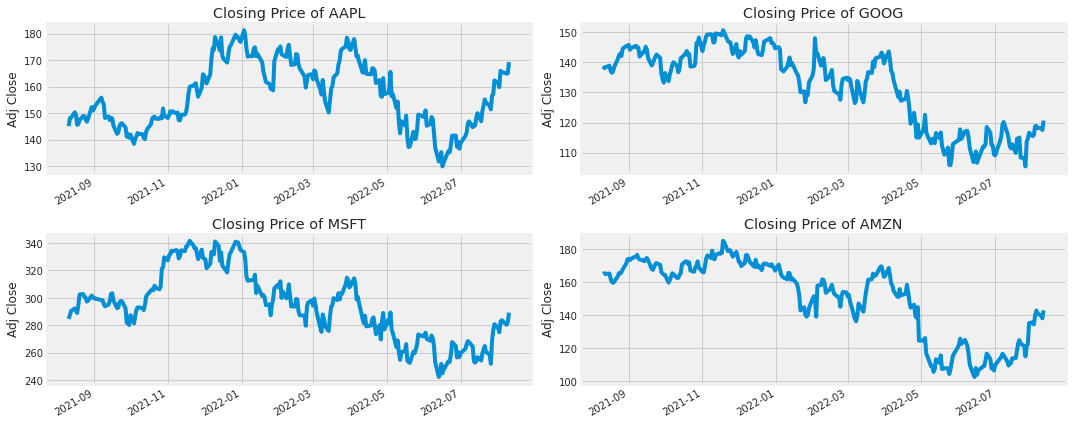

In [ ]:
pyplot.figure(figsize=(15,6))
pyplot.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  pyplot.subplot(2,2,i)
  company['Adj Close'].plot()
  pyplot.ylabel('Adj Close')
  pyplot.xlabel(None)
  pyplot.title(f"Closing Price of {tech_list[i-1]}")

pyplot.tight_layout()

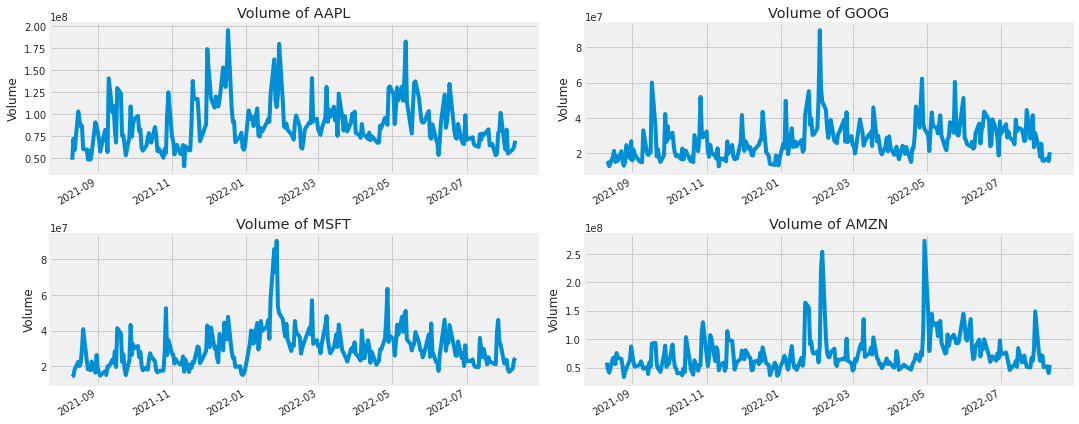

In [ ]:
pyplot.figure(figsize=(15,6))
pyplot.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  pyplot.subplot(2,2,i)
  company['Volume'].plot()
  pyplot.ylabel('Volume')
  pyplot.xlabel(None)
  pyplot.title(f"Volume of {tech_list[i-1]}")

pyplot.tight_layout()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

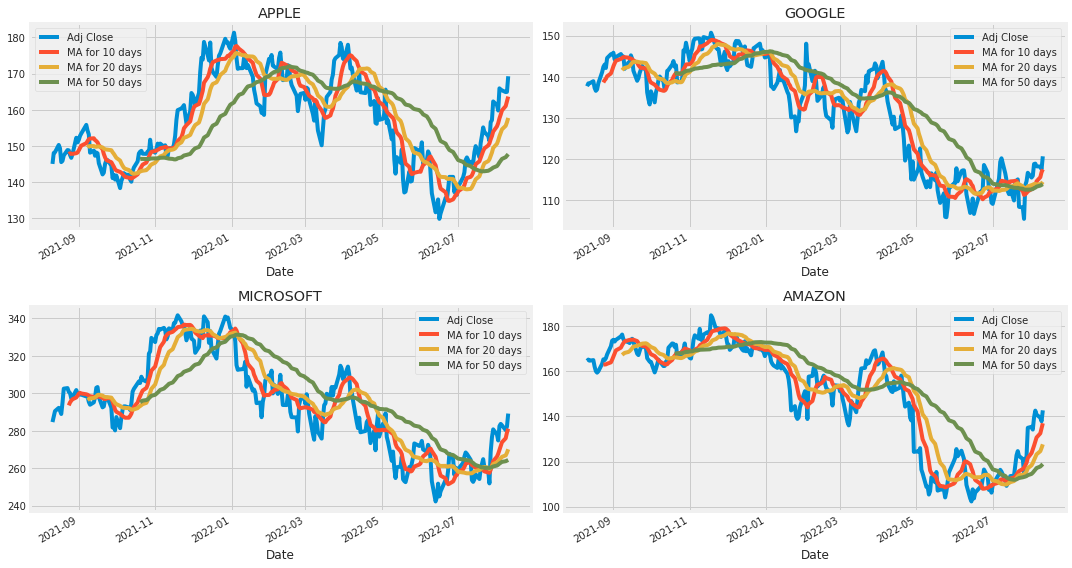

In [ ]:
fig, axes = pyplot.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

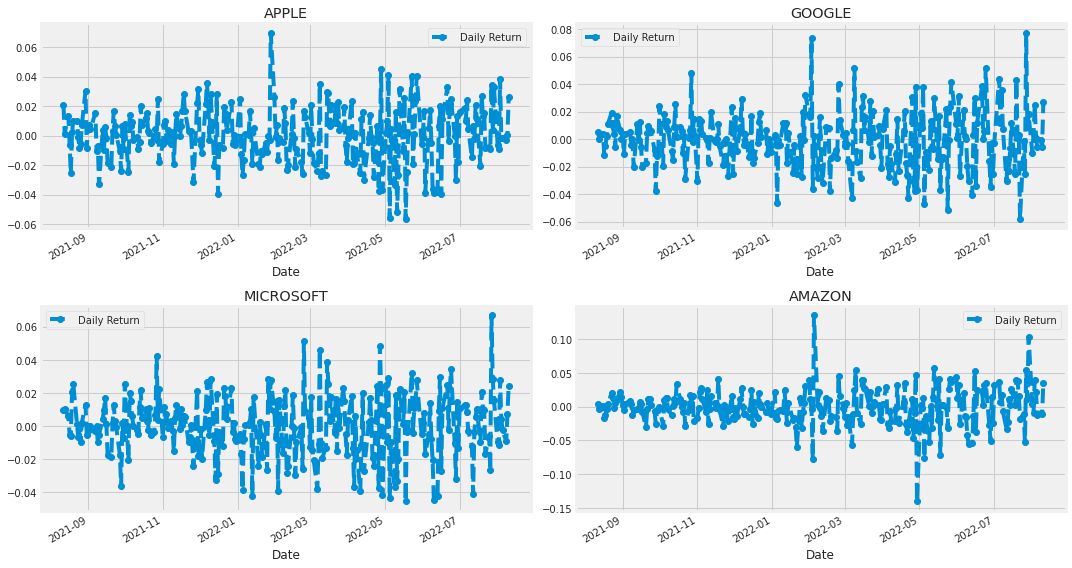

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = pyplot.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

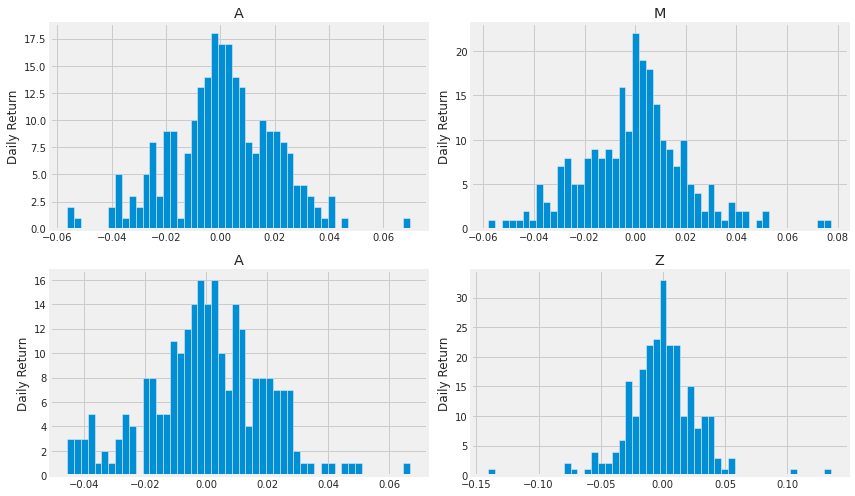

In [ ]:
pyplot.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    pyplot.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    pyplot.ylabel('Daily Return')
    pyplot.title(f'{company_name[i - 1]}')
    
pyplot.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-11,145.047226,137.689499,284.625885,164.605499
2021-08-12,148.060333,138.389496,287.462708,165.175003
2021-08-13,148.269180,138.406006,290.478119,164.698502
2021-08-16,150.277893,138.916000,292.213928,164.949493
2021-08-17,149.353104,137.300507,290.706207,162.098007


In [ ]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-11,NaN,NaN,NaN,NaN
2021-08-12,0.020773,0.005084,0.009967,0.003460
2021-08-13,0.001411,0.000119,0.010490,-0.002885
2021-08-16,0.013548,0.003685,0.005976,0.001524
2021-08-17,-0.006154,-0.011629,-0.005160,-0.017287


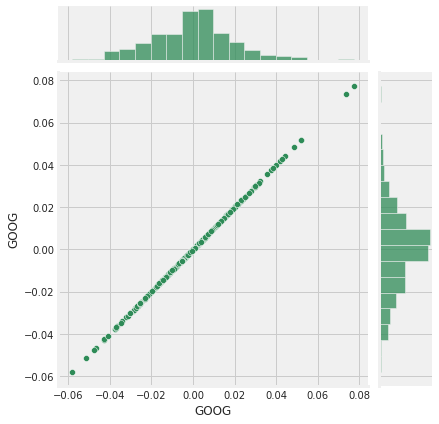

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

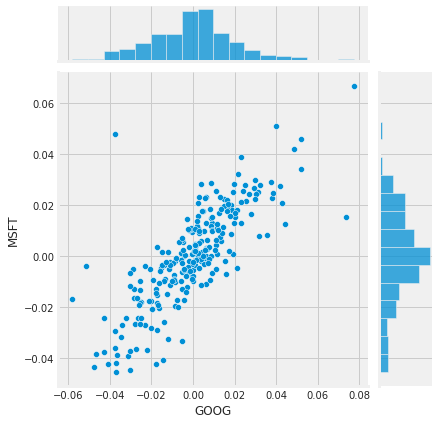

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

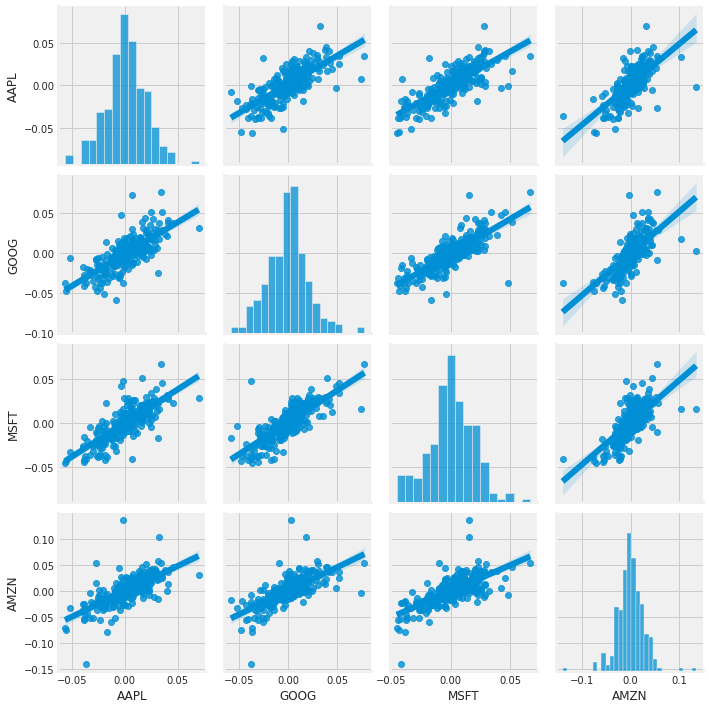

In [ ]:
sns.pairplot(tech_rets, kind='reg')

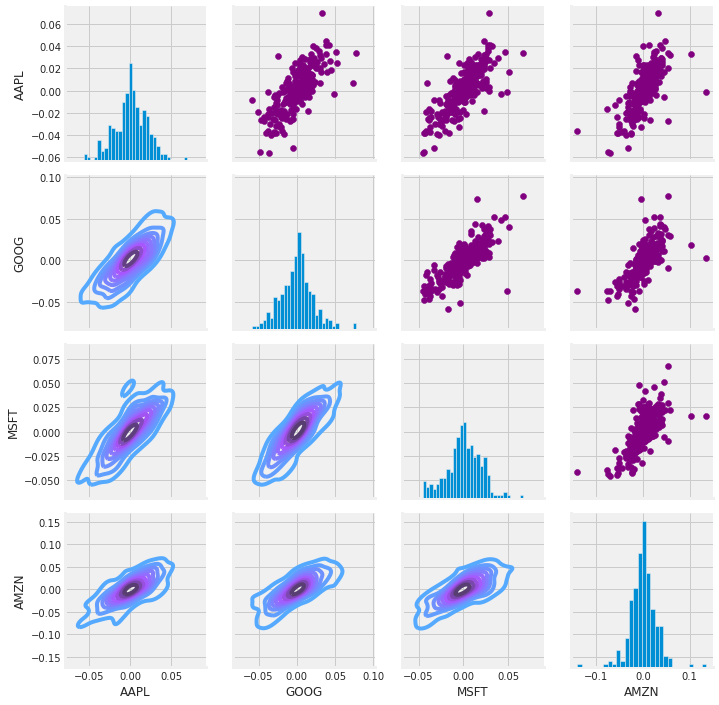

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(pyplot.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(pyplot.hist, bins=30)

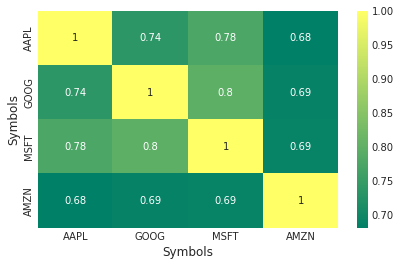

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

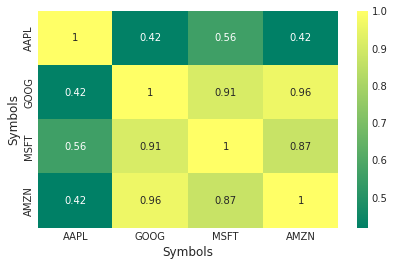

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

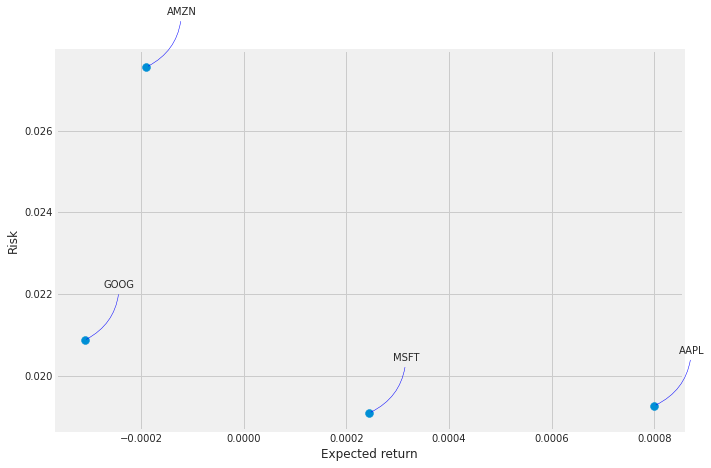

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

pyplot.figure(figsize=(10, 7))
pyplot.scatter(rets.mean(), rets.std(), s=area)
pyplot.xlabel('Expected return')
pyplot.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pyplot.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540045
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607437
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880665
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860231
...,...,...,...,...,...,...
2022-08-04,167.190002,164.429993,166.009995,165.809998,55474100.0,165.580002
2022-08-05,165.850006,163.000000,163.210007,165.350006,56646600.0,165.350006
2022-08-08,167.809998,164.199997,166.369995,164.869995,60276900.0,164.869995


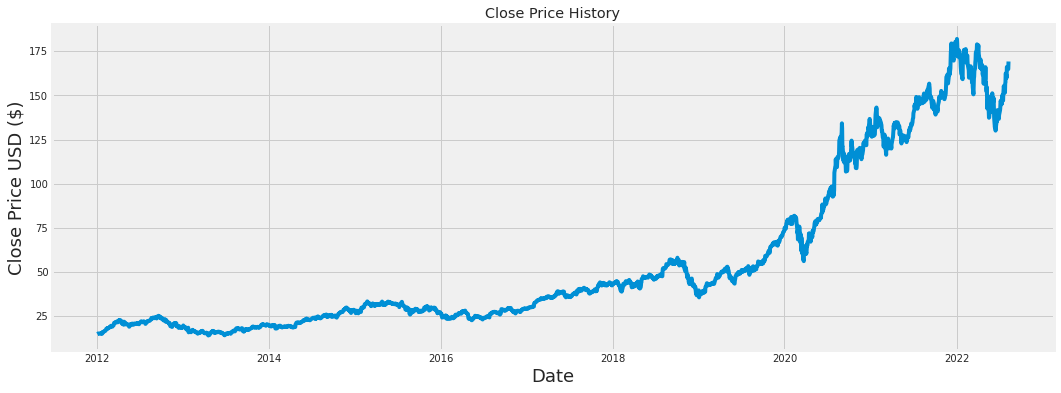

In [ ]:
pyplot.figure(figsize=(16,6))
pyplot.title('Close Price History')
pyplot.plot(df['Close'])
pyplot.xlabel('Date', fontsize=18)
pyplot.ylabel('Close Price USD ($)', fontsize=18)
pyplot.show()

In [ ]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2536

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.89801413],
       [0.89831166],
       [0.92401643]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2476/2476 [==============================] - 87s 34ms/step - loss: 0.0012


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.533742797211552

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


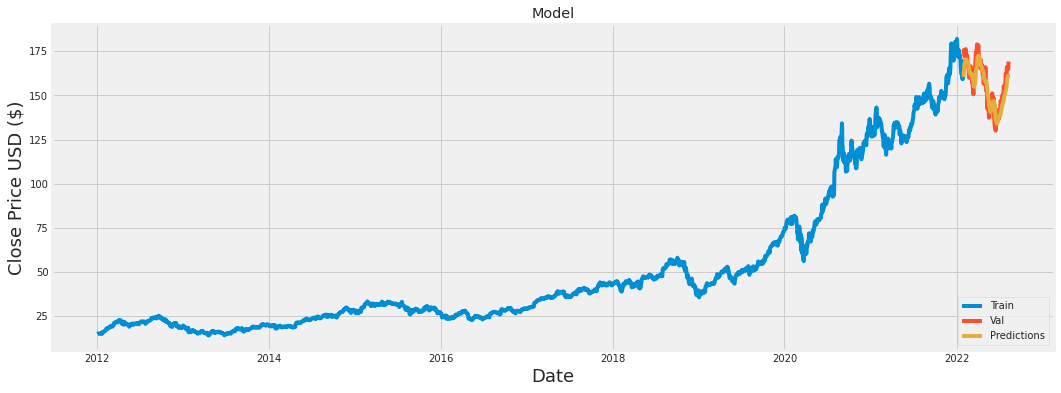

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
pyplot.figure(figsize=(16,6))
pyplot.title('Model')
pyplot.xlabel('Date', fontsize=18)
pyplot.ylabel('Close Price USD ($)', fontsize=18)
pyplot.plot(train['Close'])
pyplot.plot(valid[['Close', 'Predictions']])
pyplot.legend(['Train', 'Val', 'Predictions'], loc='lower right')
pyplot.show()

In [ ]:
valid

,Close,Predictions
Date,,
2022-01-31,174.779999,160.471680
2022-02-01,174.610001,162.470169
2022-02-02,175.839996,164.677399
2022-02-03,172.899994,166.831070
2022-02-04,172.389999,168.204041
...,...,...
2022-08-04,165.809998,158.210831
2022-08-05,165.350006,159.631149
2022-08-08,164.869995,160.744888


GRU

In [ ]:
del model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, GRU

# Build the LSTM model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2476/2476 [==============================] - 79s 31ms/step - loss: 0.0013


In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.830815255393397

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


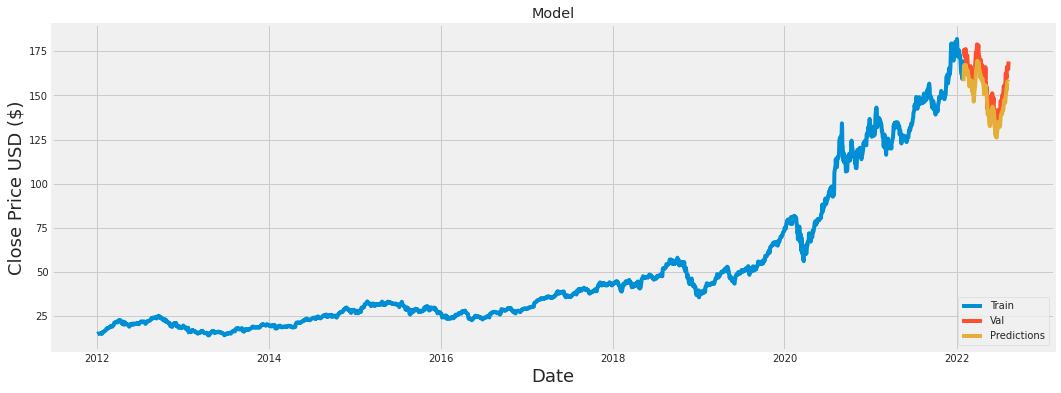

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
pyplot.figure(figsize=(16,6))
pyplot.title('Model')
pyplot.xlabel('Date', fontsize=18)
pyplot.ylabel('Close Price USD ($)', fontsize=18)
pyplot.plot(train['Close'])
pyplot.plot(valid[['Close', 'Predictions']])
pyplot.legend(['Train', 'Val', 'Predictions'], loc='lower right')
pyplot.show()

ARIMA